# SENTIMENT ANALYSIS:
#     TASKS:
## Part I--> Data Analysis:
        1.Import dependencies
        2.Data Preprocessing
        3.Data Transformation
        4.Visualisation
## Part II--> Machine Learning:
        1. Using RNN for training and testing
        2. Predict sentiment of user inputted sentence

In [71]:
#DATA ANALYSIS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [18]:
data = pd.read_csv(r"C:\Users\Kiruthika Murugesan\Desktop\CSE_lang\projects\data_analysis\social_media_sentiment_analysis\sentimentdataset.csv")

In [19]:
data.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728

In [20]:
data.shape

(732, 15)

In [21]:
data.head(20)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [22]:
data.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [23]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [24]:
data.drop(columns=['Unnamed: 0.1','Month','Day','Hour'],inplace=True)
data.head(15)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023
5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023
6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023
7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023
8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023
9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023


In [25]:
data.rename(columns={'Unnamed: 0':'S.No.'}, inplace=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head(10)

,S.No.,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023
5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023
6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023
7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023
8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023
9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023


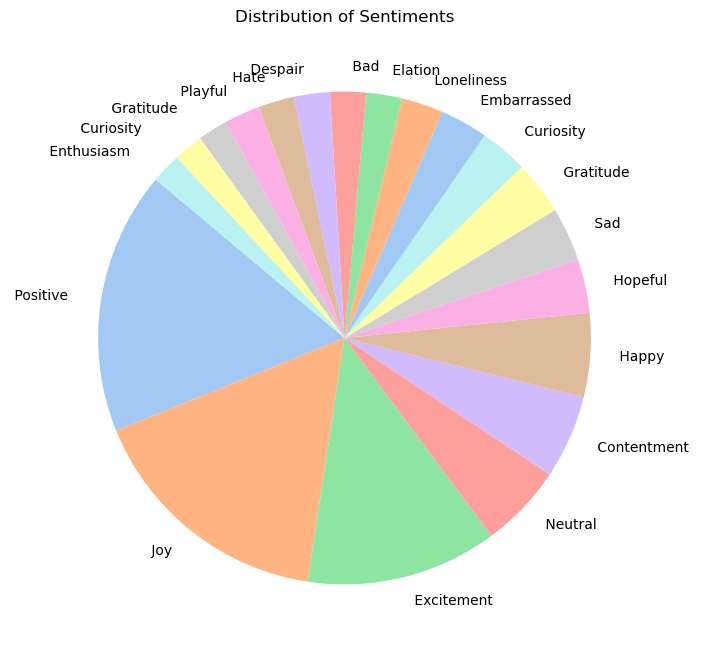

In [69]:
sentiment_counts = data['Sentiment'].value_counts().head(20)
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

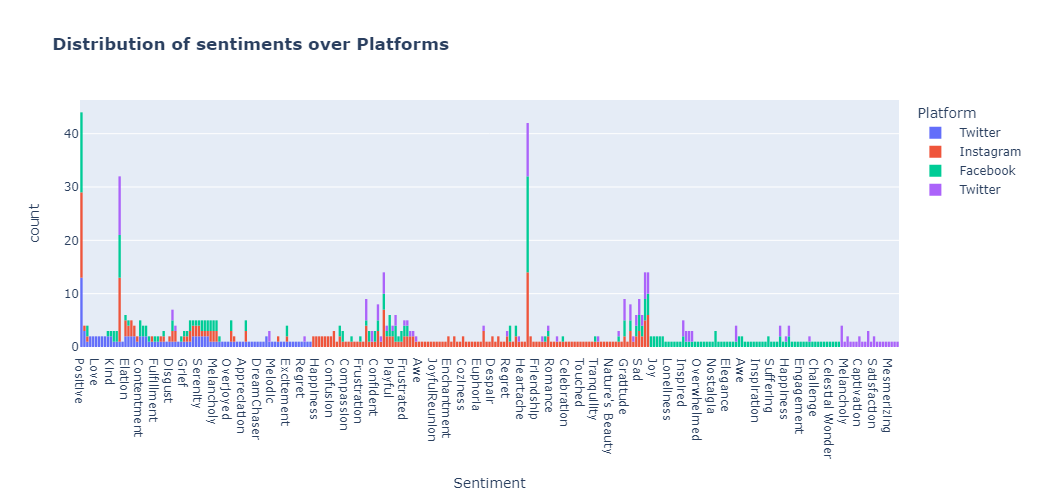

<Figure size 1000x1000 with 0 Axes>

In [26]:
plt.figure(figsize=(10,10))
fig = px.histogram(data,x="Sentiment", color="Platform", title="<b>Distribution of sentiments over Platforms</b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

### Inferences made: 
1. Positive comments are mostly found in facebook, enthusiasm and hate comments are mostly made on twitter. 
2.  A better variety of emotions are shown on instagram.

In [33]:
likes_number= data.groupby('Sentiment')['Likes'].sum().reset_index()
unique_sentiments = data[['Sentiment']].drop_duplicates()
print(unique_sentiments)

          Sentiment
0        Positive  
1        Negative  
4        Neutral   
52    Anger        
53    Fear         
..              ...
683            Sad 
684           Hate 
685            Bad 
704        Neutral 
718          Happy 

[279 rows x 1 columns]


Since there are 279 unique sentiments, let us take the top 10 sentiments and plot it against its like count.
Task- To find the most popular emotions

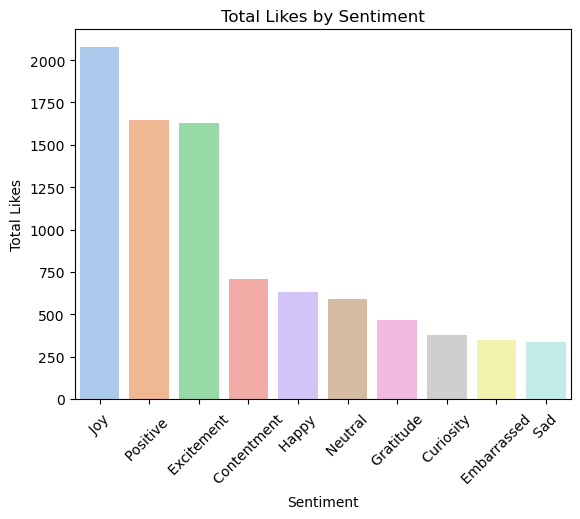

In [34]:
top_sentiments = likes_number.sort_values(by='Likes', ascending=False).head(10)
sns.barplot(data=top_sentiments, x='Sentiment', y='Likes', palette='pastel')
plt.xlabel('Sentiment')
plt.ylabel('Total Likes')
plt.title('Total Likes by Sentiment')
plt.xticks(rotation=45)
plt.show()

### Inferences made:
1. The highest liked emotions are all positive.
2. While positive comments tops the list, emotions like sadness and embarrassment are also highly relevant to the users.

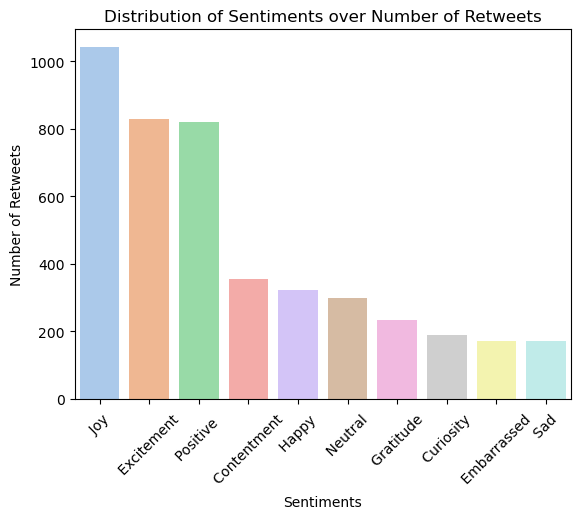

In [39]:
retweet_number = data.groupby('Sentiment')['Retweets'].sum().reset_index()
top_sentiment2 = retweet_number.sort_values(by='Retweets', ascending=False).head(10)
sns.barplot(data=top_sentiment2, x='Sentiment', y="Retweets", palette='pastel')
plt.xlabel('Sentiments')
plt.ylabel('Number of Retweets')
plt.title('Distribution of Sentiments over Number of Retweets')
plt.xticks(rotation=45)
plt.show()

### Inference made: 
The same range of emotions that had greater number of likes are most likely to be retweeted.

-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

## MACHINE LEARNING:
    --Predicting the emotion of the user inputted sentence

In [73]:
!pip install tensorflow keras

In [75]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.1
Keras version: 2.13.1


In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [82]:
df = pd.read_csv(r'C:\Users\Kiruthika Murugesan\Desktop\CSE_lang\projects\data_analysis\social_media_sentiment_analysis\sentimentdataset.csv', encoding= 'latin-1')
texts = df['Text'].astype(str).tolist()
labels = df['Sentiment'].tolist()

In [83]:
sentiment_labels = {i: sentiment for i, sentiment in enumerate(df['Sentiment'].unique())}
label_to_index = {sentiment: i for i, sentiment in sentiment_labels.items()}

labels = [label_to_index[label] for label in labels]
num_classes = len(sentiment_labels)

In [89]:
#Tokenizing the input:
max_words= 1000
tzr = Tokenizer(num_words = max_words)
tzr.fit_on_texts(texts)
sequences = tzr.texts_to_sequences(texts)

In [98]:
#Padding the sequences:
maxlen = 500
sequences_padded = pad_sequences(sequences, maxlen=maxlen)

#Convert labels to categories:
from tensorflow.keras.utils import to_categorical
labels = np.array(labels)
labels_categorical = to_categorical(labels, num_classes=num_classes)

In [100]:
#Building and compiling the model:
model = Sequential()
model.add(Embedding(max_words,32,input_length =maxlen))
model.add(SimpleRNN(32))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
#Train model:
batch_size = 128
epochs = 20
model.fit(sequences_padded, labels_categorical, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 1s 222ms/step - loss: 5.3675 - accuracy: 0.1197 - val_loss: 5.5979 - val_accuracy: 0.0272
Epoch 2/20
5/5 [==============================] - 1s 235ms/step - loss: 5.3344 - accuracy: 0.2051 - val_loss: 5.5997 - val_accuracy: 0.0204
Epoch 3/20
5/5 [==============================] - 1s 248ms/step - loss: 5.2976 - accuracy: 0.2462 - val_loss: 5.5966 - val_accuracy: 0.0272
Epoch 4/20
5/5 [==============================] - 1s 241ms/step - loss: 5.2590 - accuracy: 0.2479 - val_loss: 5.5924 - val_accuracy: 0.0408
Epoch 5/20
5/5 [==============================] - 1s 246ms/step - loss: 5.2178 - accuracy: 0.2615 - val_loss: 5.5944 - val_accuracy: 0.0340
Epoch 6/20
5/5 [==============================] - 1s 251ms/step - loss: 5.1746 - accuracy: 0.2872 - val_loss: 5.5963 - val_accuracy: 0.0476
Epoch 7/20
5/5 [==============================] - 1s 257ms/step - loss: 5.1288 - accuracy: 0.3094 - val_loss: 5.5971 - val_accuracy: 0.0476
Epoch 8/20
5/5 [====

In [113]:
def predict_sentiment(model, new_text, tzr, maxlen):
    sequence = tzr.texts_to_sequences([new_text])
    sequence_padded = pad_sequences(sequence, maxlen=maxlen)
    predicted_probabilities = model.predict(sequence_padded)
    predicted_class = np.argmax(predicted_probabilities)
    return predicted_class
    
def predict_sentiment_from_input(model, tzr, maxlen):
    while True:
        user_input = input("Enter a text (or type quit to exit): ")
        if user_input.lower() == 'quit':
            break
        predicted_class = predict_sentiment(model, user_input, tzr, maxlen)
        sentiment = sentiment_labels[predicted_class]
        print(f"Predicted Sentiment: {sentiment}")
        
predict_sentiment_from_input(model, tzr, maxlen)

Enter a text (or type quit to exit):  I am happy


1/1 [==============================] - 0s 60ms/step
Predicted Sentiment:  Excitement 


Enter a text (or type quit to exit):  Do not ever buy this product. Absolutely disgusting, terrible product. Came broken, no quality and sturdiness.


1/1 [==============================] - 0s 61ms/step
Predicted Sentiment:  Numbness        


Enter a text (or type quit to exit):  OMGGG we just got engaged, I said yes. I love him so much


1/1 [==============================] - 0s 72ms/step
Predicted Sentiment:  Positive  


Enter a text (or type quit to exit):   The state of corruption in our society is utterly disgusting. 


1/1 [==============================] - 0s 72ms/step
Predicted Sentiment:  Positive  


Enter a text (or type quit to exit):  Amidst the tulip fields of Keukenhof, a tapestry of colors that paints the soul with springtime joy. 


1/1 [==============================] - 0s 75ms/step
Predicted Sentiment:  Positive  


Enter a text (or type quit to exit):  quit
